<a href="https://colab.research.google.com/github/wenjunsun/personal-machine-learning-projects/blob/master/deep-learning/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple gradient descent using torch. - linear regression. The importance is that here we know everything that is happening, in the end we will use autograd which pytorch will allow us to do calculate gradient quickly.

simple learning approach:
1. pick a model.
2. pick a error (objective function) differentiable in terms of parameters
3. start somewhere in the parameter space
4. evaluate the function to see what I predict, see how much what I predicted differs from the ground truth (what I expect),
5. change the parameters slightly such that to minimize objective function (by walking along the gradient)
6. repeat until error converges.

problems with gradient descent:
1. usually find local optima.
2. step size (learning rate) can't be too big or too small
3. what if optimal step size for different variables are differnet???? - batch normalization I think?
4. what is momentum?

In [81]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# create synthetic data of celsius vs temperature at unknown scale (Fahrenheit) 

In [82]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [83]:
t_c

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])

In [84]:
t_u

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

Text(0, 0.5, 'Unknown units')

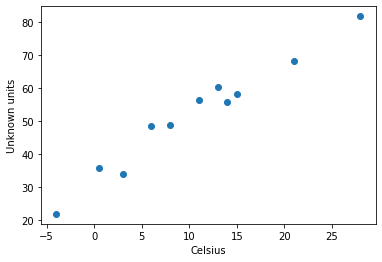

In [85]:
plt.scatter(t_c, t_u)
plt.xlabel("Celsius")
plt.ylabel('Unknown units')

# define linear model and loss function

In [86]:
# model function takes in a x and parameters and output y.
# the following t_c can be a number or a tensor
def model(t_c, w, b):
  return w * t_c + b

In [87]:
model(t_c, 2, 2)

tensor([ 3., 30., 32., 58., 24., 18.,  8., -6., 14., 28., 44.])

In [88]:
model(1, 2, 2)

4

In [89]:
t_c

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])

In [90]:
# expects two tesnors, return mean square error.
def loss(predicted, expected):
  square_diffs = (predicted - expected)**2
  return square_diffs.mean()

In [91]:
loss(t_u, t_c)

tensor(1763.8848)

In [92]:
w = torch.ones(())
b = torch.ones(())

In [93]:
w

tensor(1.)

In [94]:
b

tensor(1.)

In [95]:
loss(model(t_c, w, b), t_u)

tensor(1682.2847)

# write gradient descent for linear model

compute the gradient formula analytically (knowledge of calculus)

In our model, $\vec{\hat{y}} = w\vec{x} + b$, $L(y,\hat{y}) = \frac{1}{n}\sum_i^n(y_i-\hat{y}_i)^2$

$$\frac{\partial L}{\partial w} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w} = -\frac{1}{n}\sum_{i}^{n} 2(y_i-\hat{y_i}) \times x_i$$
$$\frac{\partial L}{\partial b} = -\frac{1}{n}\sum_{i}^{n} 2(y_i-\hat{y_i})$$

In [96]:
def gradient_w(y, y_hat, x):
  return -2 * ((y-y_hat) * x).mean()
def gradient_b(y, y_hat):
  return -2 * (y-y_hat).mean()

In [97]:
def gradient(y, y_hat, x):
  grad_w = gradient_w(y, y_hat, x)
  grad_b = gradient_b(y, y_hat)
  return torch.stack((grad_w, grad_b))

In [98]:
gradient(t_u, model(t_c, w, b), t_c)

tensor([-968.5273,  -80.6000])

In [99]:
lr = 1e-3

In [100]:
def one_train_loop(w, b):
  # forward pass. notice here we need to evaluate our model
  # first before we can get the gradient.
  # we can't obtain gradient without forward passes.
  # in a more complicated network we need to evaluate every layer
  # before we obtain the gradient.
  grad = gradient(t_u, model(t_c, w, b), t_c)
  # backward pass
  w -= lr * grad[0]
  b -= lr * grad[1]
  return (w, b)

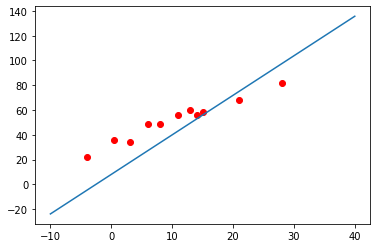

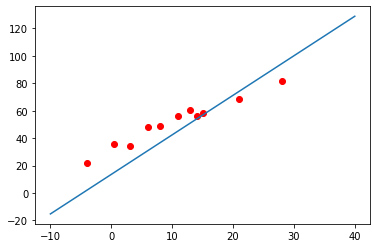

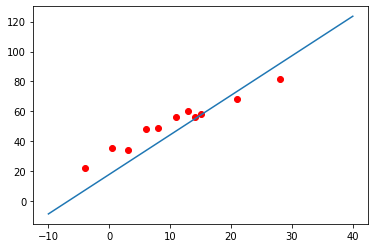

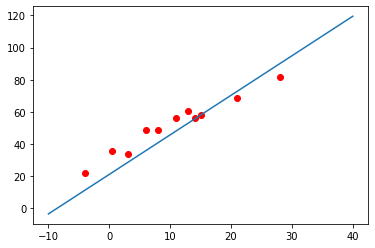

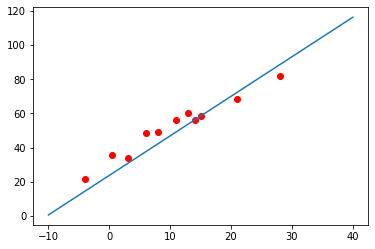

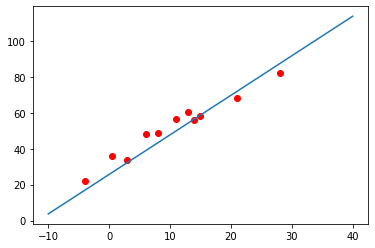

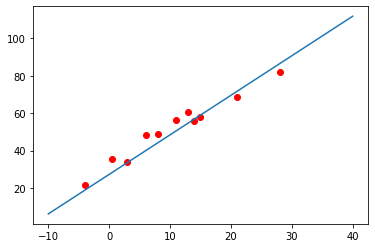

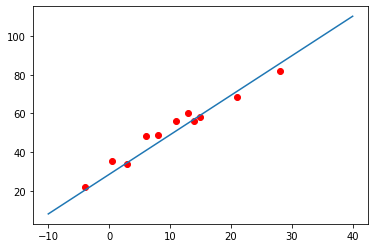

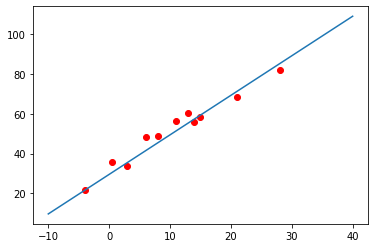

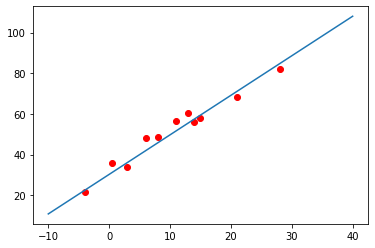

In [101]:
for j in range(10):
  for i in range(300):
    w, b = one_train_loop(w, b)
  plt.figure()
  x = np.linspace(-10, 40)
  plt.plot(x, w * x + b)
  plt.scatter(t_c, t_u, color = 'r')

In [102]:
w

tensor(1.9445)

In [103]:
b

tensor(30.2697)

We can literally see the fitting line gets better and better as we do more and more gradient descent. A nice thing about linear model + convex loss function is that our loss function will be convex in terms of parameters, and so there will only be 1 global minima. Ergo we can start at any place in parameter space, and we will arrive at this final parameter eventually.

# a larger learning rate

Now let's try a larger learning rate

In [104]:
lr = 1e-2

In [105]:
w = torch.ones(())
b = torch.ones(())

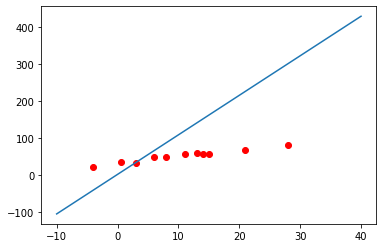

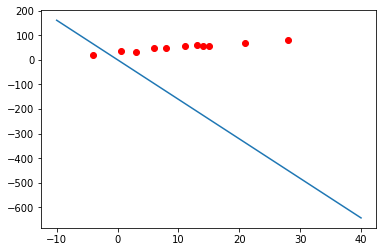

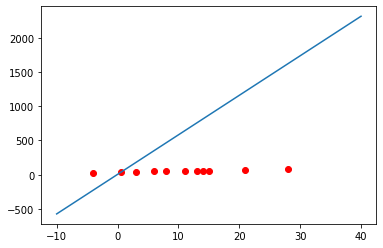

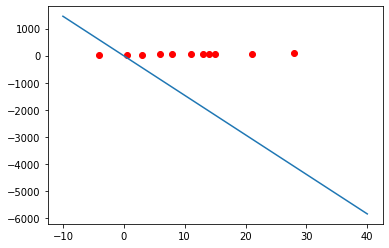

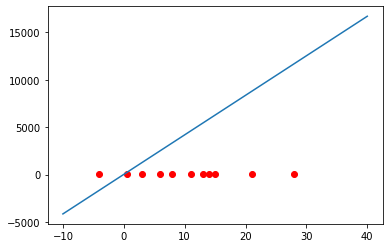

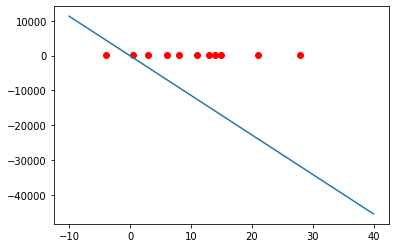

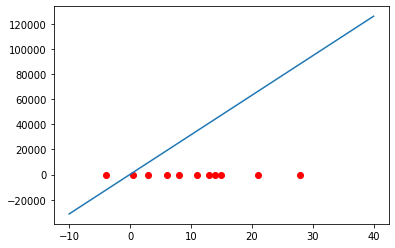

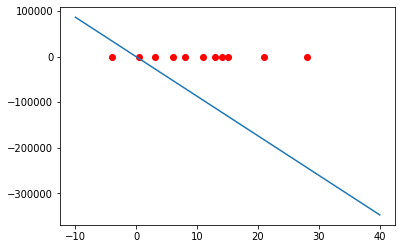

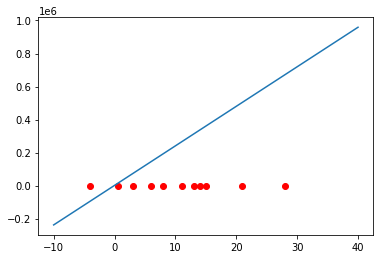

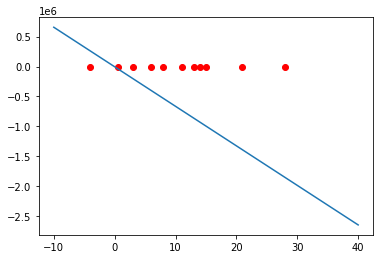

In [106]:
for j in range(10):
  for i in range(1):
    w, b = one_train_loop(w, b)
  plt.figure()
  x = np.linspace(-10, 40)
  plt.plot(x, w * x + b)
  plt.scatter(t_c, t_u, color = 'r')

In [107]:
w

tensor(-66061.7422)

In [108]:
b

tensor(-3706.3547)

As we can see, now the line goes up and down and never converges to the true line. This is a sign that our optimization is overshooting the local minima to the other side of the hill and never comes down because we are taking too big a step.

# a big point about normalizing input

Another thing we need to keep in mind is that the gradient of $w$ and $b$ might not be in the same scale. For example, gradient for $w$ might be $100$ and for $b$ might be $1$. In this case it is impossible to pick a learning rate that works on both scales. A learning rate that is good along w direction might not be good for b directoin and vice versa.

To avoid this the simplest thing we can do it to make all variables to be in the same scale by normalizing (or normalizing the gradient??? Would that work?)

In [109]:
def one_train_loop(w, b):
  # forward pass. notice here we need to evaluate our model
  # first before we can get the gradient.
  # we can't obtain gradient without forward passes.
  # in a more complicated network we need to evaluate every layer
  # before we obtain the gradient.
  grad = gradient(t_u, model(t_c, w, b), t_c)
  print('gradient is ', end = '')
  print(grad)
  # backward pass
  w -= lr * grad[0]
  b -= lr * grad[1]
  return (w, b)

In [110]:
lr = 1e-3

In [111]:
w = torch.ones(())
b = torch.ones(())

In [112]:
for j in range(10):
  w, b = one_train_loop(w, b)

gradient is tensor([-968.5273,  -80.6000])
gradient is tensor([-603.8570,  -60.0997])
gradient is tensor([-376.2858,  -47.2985])
gradient is tensor([-234.2709,  -39.3019])
gradient is tensor([-145.6473,  -34.3036])
gradient is tensor([-90.3422, -31.1764])
gradient is tensor([-55.8297, -29.2169])
gradient is tensor([-34.2927, -27.9860])
gradient is tensor([-20.8530, -27.2099])
gradient is tensor([-12.4665, -26.7176])


we can see that the gradient for w is almost 10 times as big as gradient for b, so we can mitigate the scale imbalance by scaling the input vector by $\frac{1}{10}$

In [113]:
t_c = 0.1 * t_c

In [114]:
w = torch.ones(())
b = torch.ones(())

In [115]:
for j in range(10):
  w, b = one_train_loop(w, b)

gradient is tensor([-130.5823,  -99.5000])
gradient is tensor([-129.8839,  -99.0268])
gradient is tensor([-129.1892,  -98.5560])
gradient is tensor([-128.4981,  -98.0876])
gradient is tensor([-127.8105,  -97.6215])
gradient is tensor([-127.1265,  -97.1579])
gradient is tensor([-126.4461,  -96.6966])
gradient is tensor([-125.7691,  -96.2377])
gradient is tensor([-125.0957,  -95.7811])
gradient is tensor([-124.4257,  -95.3268])


Look now that both gradient matches pretty well in scale!!!

gradient is tensor([-130.5823,  -99.5000])
gradient is tensor([-129.8839,  -99.0268])
gradient is tensor([-129.1892,  -98.5560])
gradient is tensor([-128.4981,  -98.0876])
gradient is tensor([-127.8105,  -97.6215])
gradient is tensor([-127.1265,  -97.1579])
gradient is tensor([-126.4461,  -96.6966])
gradient is tensor([-125.7691,  -96.2377])
gradient is tensor([-125.0957,  -95.7811])
gradient is tensor([-124.4257,  -95.3268])
gradient is tensor([-123.7592,  -94.8749])
gradient is tensor([-123.0961,  -94.4252])
gradient is tensor([-122.4365,  -93.9779])
gradient is tensor([-121.7803,  -93.5328])
gradient is tensor([-121.1275,  -93.0900])
gradient is tensor([-120.4781,  -92.6495])
gradient is tensor([-119.8320,  -92.2112])
gradient is tensor([-119.1892,  -91.7751])
gradient is tensor([-118.5498,  -91.3412])
gradient is tensor([-117.9137,  -90.9096])
gradient is tensor([-117.2809,  -90.4802])
gradient is tensor([-116.6513,  -90.0529])
gradient is tensor([-116.0250,  -89.6278])
gradient is

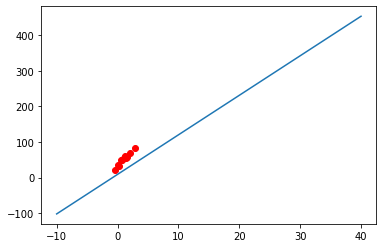

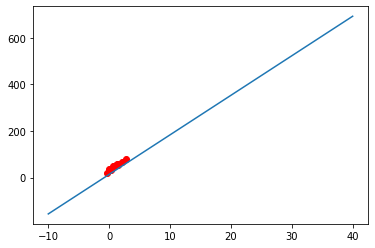

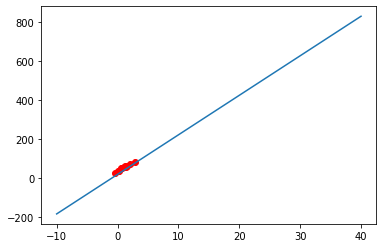

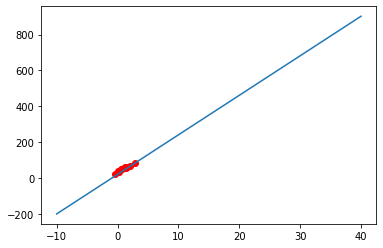

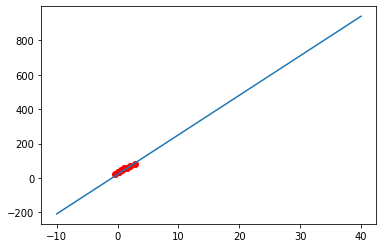

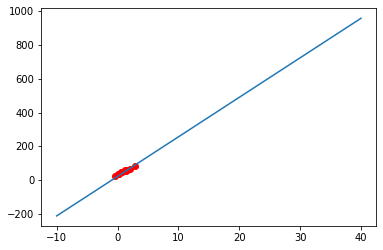

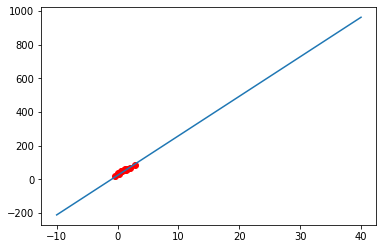

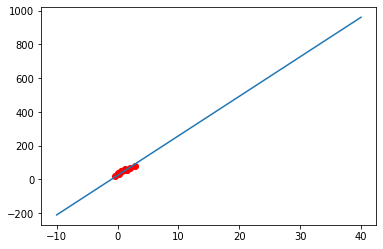

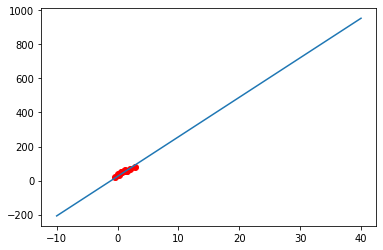

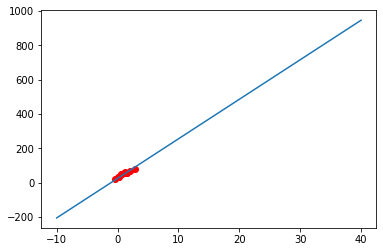

In [116]:
w = torch.ones(())
b = torch.ones(())
for j in range(10):
  for i in range(100):
    w, b = one_train_loop(w, b)
  plt.figure()
  x = np.linspace(-10, 40)
  plt.plot(x, w * x + b)
  plt.scatter(t_c, t_u, color = 'r')

Notice that now training even works for a larger learning rate which would typically blow off before!

# conclusion

- it is important to **normalize** input in neural nets, so that gradient with respect to different parameters are in the same scale, so the learning rate can apply to every parameter, rather than picking learning rate for each parameter individually.
- it is **important to pick a good learning rate**, too big of a learning rate will make the learning diverge from the true solution. too small means we need to iterate a lot of steps than necessary. Later we will see how to pick a good learning rate
- training with gradient descent involves a **forward pass** where every layer of network is being evaluated given the current parameters and inputs, and a **backward pass** evaluate the gradient with respect to every parameter in the model, given the values of each neuron, take a negative step along the gradient, and repeat.